## MULTIPLE LINEAR REGRESSION

**Assignment Task:** <br>
Task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.<br>

**Dataset Description:** <br>
The dataset consists of the following variables:<br>
Age: Age in years <br>
KM: Accumulated Kilometers on odometer <br>
FuelType: Fuel Type (Petrol, Diesel, CNG) <br>
HP: Horse Power <br>
Automatic: Automatic ( (Yes=1, No=0)<br>
CC: Cylinder Volume in cubic centimeters <br>
Doors: Number of doors <br>
Weight: Weight in Kilograms <br>
Quarterly_Tax: <br>
Price: Offer Price in EUROs <br>


In [293]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import matplotlib
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")
%matplotlib inline

### Data Cleaning and Preparation:

In [294]:
# Importing Dataset
data = pd.read_csv("ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [295]:
data.shape

(1436, 11)

In [296]:
data.Automatic.value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [297]:
data.Cylinders.value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [299]:
# Checking for Null Values
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

**There are no null values**

In [300]:
# Checking for duplicate values
data[data.duplicated()].shape

(1, 11)

In [301]:
# View of duplicate values
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


**Since Door and Gears are different subjects we keep this column.**

In [302]:
# Removing some qualitative data
data_MLR = data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']]
data_MLR.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


In [303]:
# Rename of columns

data_MLR = data_MLR.rename({'Age_08_04': 'Age', 'cc': 'CC'}, axis=1)
data_MLR.head()

,Price,Age,KM,HP,CC,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


In [304]:
# Ckecking for data types
data_MLR.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
Weight    int64
dtype: object

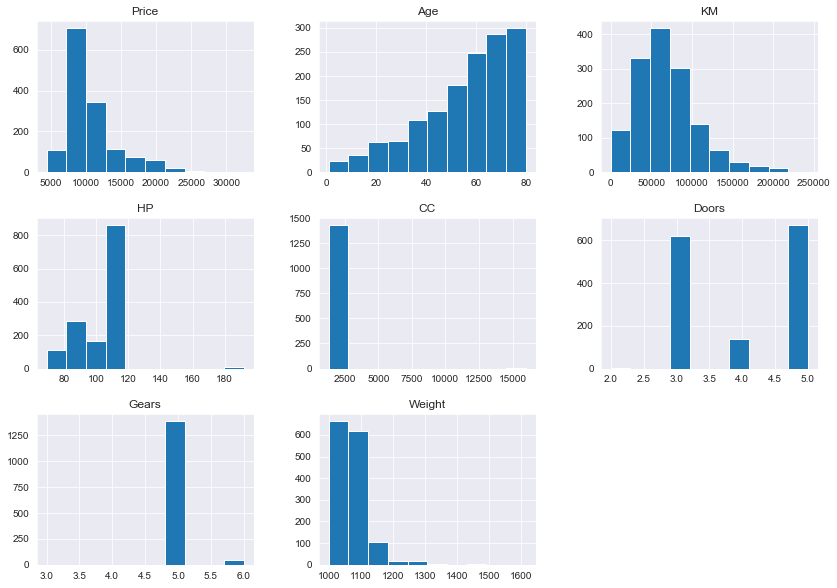

In [305]:
# Outlier detection
data_MLR.hist(figsize=[14, 10]) 
plt.show() 

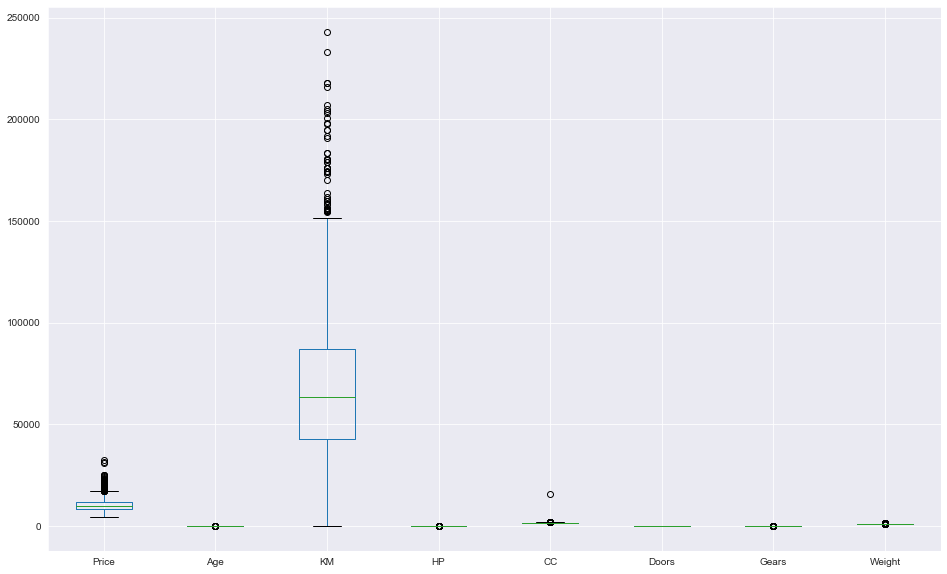

In [306]:
data_MLR.boxplot(figsize=[16, 10])
plt.show()

**Kilometers and Price have significant outliers.**

In [307]:
data_MLR.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,1615.00000


In [308]:
data_MLR.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,1.000000


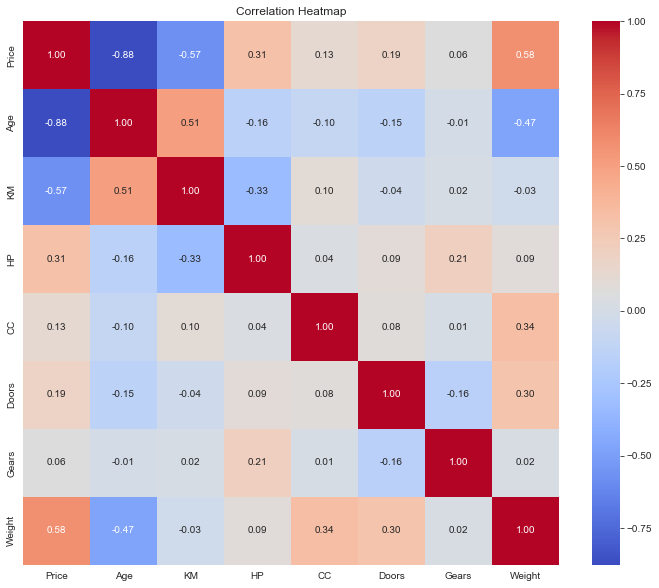

In [309]:
# Correlation heat map

corr = data_MLR.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Graphs

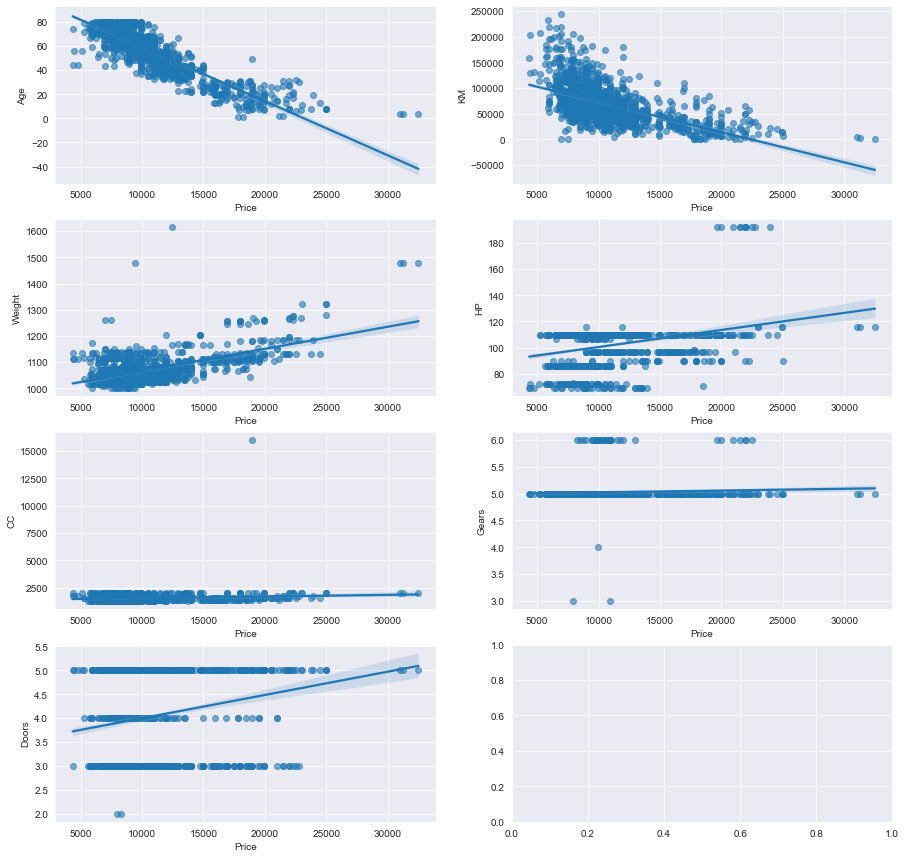

In [310]:
f, axes = plt.subplots(4, 2, figsize=(15,15))

sns.regplot(x = 'Price', y = 'Age', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[1,1])
sns.regplot(x = 'Price', y = 'CC', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[2,0])
sns.regplot(x = 'Price', y = 'Gears', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[2,1])
sns.regplot(x = 'Price', y = 'Doors', data = data_MLR, scatter_kws={'alpha':0.6}, ax = axes[3,0])

plt.show()

### Train-Test Spliting

In [311]:
# Split the data into features and target variable
X = data_MLR.drop('Price', axis=1)
y = data_MLR['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

#### Model 1

In [312]:
# Model 1: All numerical features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = mean_squared_error(y_test, y_pred1, squared=False)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - MSE: {mse1}, RMSE: {rmse1}, R2: {r2_1}")

Model 1 - MSE: 1978740.4736284816, RMSE: 1406.6771035417053, R2: 0.8516996336517376


#### Model 2

In [313]:
# Model 2: Subset of numerical features
features2 = ['Age', 'KM', 'HP', 'Weight']
X_train2 = X_train[features2]
X_test2 = X_test[features2]

model2 = LinearRegression()
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 - MSE: {mse2}, RMSE: {rmse2}, R2: {r2_2}")

Model 2 - MSE: 1993321.012973071, RMSE: 1411.85020911323, R2: 0.8506068681500583


#### Model 3

In [314]:
# Model 3: Linear Regression with interaction terms
X_train_interaction = X_train.copy()
X_test_interaction = X_test.copy()
X_train_interaction['Age_KM'] = X_train['Age'] * X_train['KM']
X_test_interaction['Age_KM'] = X_test['Age'] * X_test['KM']

model3 = LinearRegression()
model3.fit(X_train_interaction, y_train)
y_pred3 = model3.predict(X_test_interaction)

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = mean_squared_error(y_test, y_pred3, squared=False)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 2 - MSE: {mse3}, RMSE: {rmse3}, R2: {r2_3}")

Model 2 - MSE: 1697558.8932015013, RMSE: 1302.9040230199234, R2: 0.8727733075081373


#### Accuracy Graph of all three models

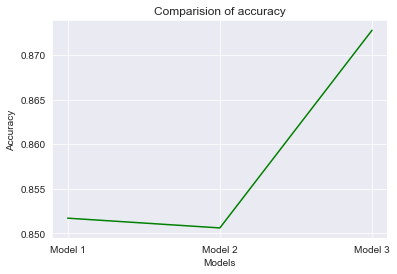

In [315]:
# Creating bar plot of accuracies. 
r2 = [r2_1, r2_2, r2_3]
models = ["Model 1", "Model 2", "Model 3"]

# creating the bar plot
plt.plot(models, r2, color ='green')
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparision of accuracy")
plt.show()

### Lasso and Ridge Methods

#### Lasso Model

In [316]:
# Function for Model Evaluation

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

In [317]:
# Train the Lasso model on model 1
lasso_1 = Lasso(alpha=0.1)
lasso_1.fit(X_train, y_train)
y_pred_lasso_1 = lasso_1.predict(X_test)

mse_lasso_1, rmse_lasso_1, r2_lasso_1 = evaluate_model(y_test, y_pred_lasso_1)
print(f"Lasso - MSE: {mse_lasso_1}, RMSE: {rmse_lasso_1}, R2: {r2_lasso_1}")

Lasso - MSE: 1978771.8999715063, RMSE: 1406.688273915549, R2: 0.8516972783463068


In [318]:
# Train the Lasso model on model 3

lasso_3 = Lasso(alpha=0.1)
lasso_3.fit(X_train_interaction, y_train)
y_pred_lasso_3 = lasso_3.predict(X_test_interaction)

# Evaluate the model
mse_lasso_3, rmse_lasso_3, r2_lasso_3 = evaluate_model(y_test, y_pred_lasso_3)
print(f"Lasso - MSE: {mse_lasso_3}, RMSE: {rmse_lasso_3}, R2: {r2_lasso_3}")

Lasso - MSE: 1697634.588179047, RMSE: 1302.9330712584767, R2: 0.8727676344079758


#### Variable Importance

In [319]:
# Plot variable importance for Lasso for model 1

rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+Weight',data=data_MLR).fit().rsquared  
vif_Age= 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+Weight',data=data_MLR).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+Weight',data=data_MLR).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('CC~Age+HP+KM+Doors+Gears+Weight',data=data_MLR).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+HP+KM+CC+Gears+Weight',data=data_MLR).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+KM+Doors+CC+Weight',data=data_MLR).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Weight = smf.ols('Weight~Age+HP+KM+Doors+Gears+CC',data=data_MLR).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)


# Storing vif values in a data frame
df = {'Feature':['Age','KM','HP','CC','Doors','Gears','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Weight]}
Vif_df = pd.DataFrame(df)  
Vif_df



,Feature,VIF
0,Age,1.874559
1,KM,1.645618
2,HP,1.218056
3,CC,1.146729
4,Doors,1.150044
5,Gears,1.096603
6,Weight,1.643962


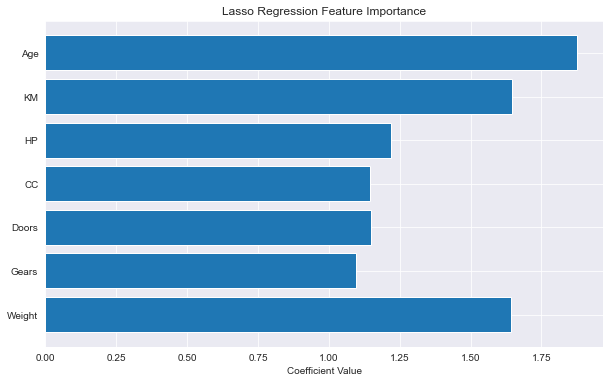

In [321]:
# VIF Plot

plt.figure(figsize=(10, 6))
plt.barh(Vif_df['Feature'], Vif_df['VIF'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#### Ridge Model

In [322]:
# Try different solvers and alpha values for Ridge Regression
best_r2 = -np.inf
best_alpha = None
best_solver = None

solvers = ['svd', 'lsqr', 'sparse_cg', 'sag', 'saga']

for solver in solvers:
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, solver=solver)
        ridge.fit(X_train, y_train)
        y_pred_ridge = ridge.predict(X_test)

        r2 = r2_score(y_test, y_pred_ridge)
        
        if r2 > best_r2:
            best_r2 = r2
            best_alpha = alpha
            best_solver = solver

print(f"Best Ridge Model - Alpha: {best_alpha}, Solver: {best_solver}, R2: {best_r2}")

# Fit the best model model 1
ridge_1 = Ridge(alpha=best_alpha, solver=best_solver)
ridge_1.fit(X_train, y_train)
y_pred_ridge_1 = ridge_1.predict(X_test)

# Evaluate the model
mse_ridge_1, rmse_ridge_1, r2_ridge_1 = evaluate_model(y_test, y_pred_ridge_1)
print(f"Ridge - MSE: {mse_ridge_1}, RMSE: {rmse_ridge_1}, R2: {r2_ridge_1}")

Best Ridge Model - Alpha: 0.1, Solver: svd, R2: 0.8516980633466482
Ridge - MSE: 1978761.42587771, RMSE: 1406.6845509486873, R2: 0.8516980633466482


In [323]:
# Fit the best ridge model for model 3 data
ridge_3 = Ridge(alpha=best_alpha, solver=best_solver)
ridge_3.fit(X_train_interaction, y_train)
y_pred_ridge_3 = ridge_3.predict(X_test_interaction)

# Evaluate the model 
mse_ridge_3, rmse_ridge_3, r2_ridge_3 = evaluate_model(y_test, y_pred_ridge_3)
print(f"Ridge - MSE: {mse_ridge_3}, RMSE: {rmse_ridge_3}, R2: {r2_ridge_3}")

Ridge - MSE: 1697594.9163401872, RMSE: 1302.9178471186076, R2: 0.8727706076873496


### Results and Conclusions

#### Correlation Matrix Insights
**Age:** Highly negatively correlated with Price (-0.8766). As the age of the car increases, the price significantly decreases. <br>
**KM:** Moderately negatively correlated with Price (-0.5700). Higher accumulated kilometers tend to reduce the car price.<br>
**Weight:** Positively correlated with Price (0.5812). Heavier cars seem to be priced higher.<br>
**HP:** Positively correlated with Price (0.3150). Higher horsepower tends to increase the car price. <br>
Conclusion <br>

**Best Model:** Model 3 achieved the best performance with the lowest MSE (1,697,558.89), lowest RMSE (1,302.90), and highest R² (0.8728). <br>

**Regularization Techniques:** Both Lasso and Ridge regressions performed similarly to the base models, slightly improving performance in some cases, particularly for Model 3 data.

**Key Predictors:** Age, KM, and Weight are the most significant predictors of the price of Toyota Corolla cars, with Age being the most influential factor.

#### Recommendations
**Focus on Reducing Age Impact:** Since Age has the highest negative correlation with Price, strategies such as warranty extensions or showcasing maintenance history could help mitigate its impact on car valuation. <br>
**Highlight Horsepower and Weight:** Marketing the benefits of higher horsepower and heavier build quality could justify higher pricing for customers.<br>
**Data Collection Enhancement:** Consider collecting additional features that could affect car prices, such as previous ownership details, service history, and condition scores, to further improve model accuracy.
Model Fine-Tuning: Experiment with other advanced regression techniques and ensemble methods to potentially achieve better performance.